In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('kano_population_1950_to_2035.csv')

In [9]:
df

,growth,growthRate,population,year
0,211949,0.033289,6578980,2035
1,209076,0.033952,6367031,2034
2,205970,0.034605,6157955,2033
3,202246,0.035175,5951985,2032
4,198553,0.035768,5749739,2031
...,...,...,...,...
81,10619,0.078794,145389,1954
82,6142,0.047750,134770,1953
83,2810,0.022334,128628,1952
84,2745,0.022304,125818,1951


In [10]:
df.isnull().sum()

growth        0
growthRate    0
population    0
year          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [12]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,75068.686047,0.047822,2.338805e+06,1992.500000
std,55163.640076,0.031729,1.781826e+06,24.969982
min,0.000000,0.000000,1.230730e+05,1950.000000
25%,43914.000000,0.021562,6.079572e+05,1971.250000
50%,59208.500000,0.031676,2.217876e+06,1992.500000
75%,92431.000000,0.078884,3.489232e+06,2013.750000
max,211949.000000,0.095650,6.578980e+06,2035.000000


### Outliers

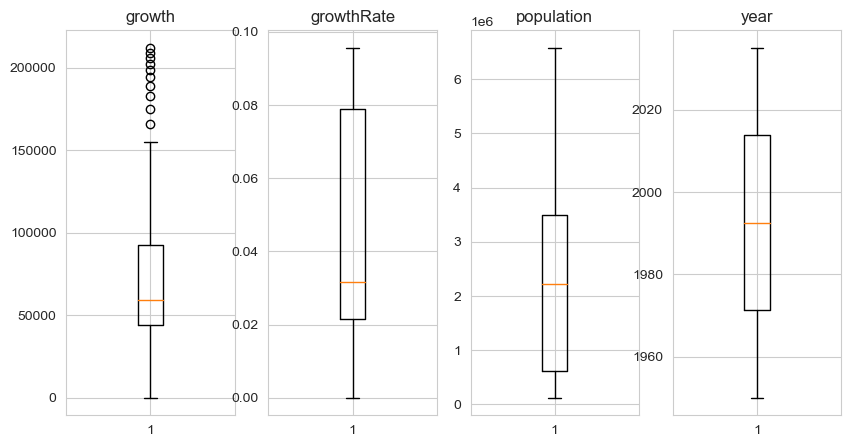

In [13]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [14]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df

In [15]:
detect_outliers(df,'growth')
detect_outliers(df,'population')
detect_outliers(df,'growthRate')
detect_outliers(df,'year')

The number of outliers: 0
The number of outliers: 0
The number of outliers: 0
The number of outliers: 0


,growth,growthRate,population,year
0,211949,0.033289,6578980,1.712026
1,209076,0.033952,6367031,1.671743
2,205970,0.034605,6157955,1.631460
3,202246,0.035175,5951985,1.591178
4,198553,0.035768,5749739,1.550895
...,...,...,...,...
81,10619,0.078794,145389,-1.550895
82,6142,0.047750,134770,-1.591178
83,2810,0.022334,128628,-1.631460
84,2745,0.022304,125818,-1.671743
